## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

## 导入波士顿房价数据

In [22]:
from sklearn.datasets import load_boston

In [23]:
data = load_boston()

In [24]:
Feature, Price = data['data'], data['target']

In [4]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [25]:
X_rm = Feature[:, 5]

In [9]:
len(X_rm)

506

In [34]:
%matplotlib inline

In [35]:
from matplotlib import pyplot as plt

In [36]:
def draw_rm_and_price():
    plt.scatter(X_rm, Price)

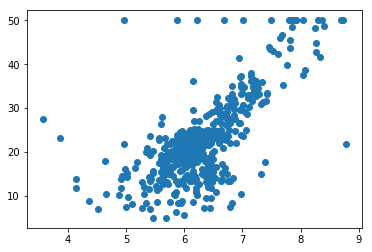

In [14]:
draw_rm_and_price()

### 1. Random Choose Method to get optimal k* and *b

In [27]:
import random

In [28]:
def price(rm, k, b): return k * rm + b  

In [29]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [21]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(Price, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -91.58599663824171 best_b: 72.94946387730374, and the loss is: 280839.85807612096
When time is : 2, get best_k: -15.914711623966298 best_b: 1.358497200141386, and the loss is: 15039.560251714744
When time is : 9, get best_k: 13.054804740793813 best_b: -22.089665275864178, and the loss is: 1451.7196170520144
When time is : 20, get best_k: 7.891548645284473 best_b: -33.232563153333274, and the loss is: 82.38988931854692
When time is : 255, get best_k: 14.849711263248636 best_b: -74.20792437236338, and the loss is: 71.54387960847875
When time is : 709, get best_k: 12.286488425615232 best_b: -50.027606247344835, and the loss is: 70.27192602033854
When time is : 801, get best_k: 8.007407532333616 best_b: -28.836547342869736, and the loss is: 45.28452420037912


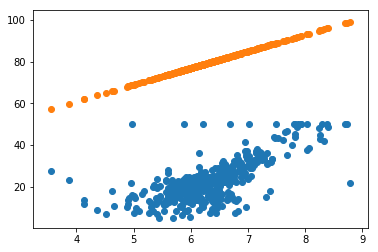

In [22]:
draw_rm_and_price()
price_by_random_k_and_b = [price(r, 8.007407532333616, 28.836547342869736) for r in X_rm]
plt.scatter(X_rm, price_by_random_k_and_b)

### 2.Supervised Direction to get optimal k* and *b

In [33]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1), 
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(Price, price_by_k_and_b)
    
    if current_loss < min_loss: 
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        direction_copy = direction[:]
        direction_copy.remove(next_direction)
        next_direction = random.choice(direction_copy)

When time is : 0, get best_k: 36.578667894114794 best_b: -5.828588358161587, and the loss is: 41026.7471002735
When time is : 1, get best_k: 36.47866789411479 best_b: -5.928588358161587, and the loss is: 40730.972121932566
When time is : 2, get best_k: 36.37866789411479 best_b: -6.028588358161587, and the loss is: 40436.26831545912
When time is : 3, get best_k: 36.27866789411479 best_b: -6.128588358161586, and the loss is: 40142.63568085311
When time is : 4, get best_k: 36.17866789411479 best_b: -6.228588358161586, and the loss is: 39850.074218114576
When time is : 5, get best_k: 36.07866789411479 best_b: -6.328588358161586, and the loss is: 39558.58392724349
When time is : 6, get best_k: 35.978667894114785 best_b: -6.428588358161585, and the loss is: 39268.16480823994
When time is : 7, get best_k: 35.878667894114784 best_b: -6.528588358161585, and the loss is: 38978.816861103754
When time is : 8, get best_k: 35.77866789411478 best_b: -6.6285883581615845, and the loss is: 38690.5400858

When time is : 137, get best_k: 22.8786678941146 best_b: -19.528588358161603, and the loss is: 10484.612184917687
When time is : 138, get best_k: 22.778667894114598 best_b: -19.628588358161604, and the loss is: 10335.587752420175
When time is : 139, get best_k: 22.678667894114596 best_b: -19.728588358161605, and the loss is: 10187.634491790142
When time is : 140, get best_k: 22.578667894114595 best_b: -19.828588358161607, and the loss is: 10040.752403027584
When time is : 141, get best_k: 22.478667894114594 best_b: -19.92858835816161, and the loss is: 9894.941486132486
When time is : 142, get best_k: 22.378667894114592 best_b: -20.02858835816161, and the loss is: 9750.20174110486
When time is : 143, get best_k: 22.27866789411459 best_b: -20.12858835816161, and the loss is: 9606.533167944695
When time is : 144, get best_k: 22.17866789411459 best_b: -20.228588358161613, and the loss is: 9463.935766652012
When time is : 145, get best_k: 22.078667894114588 best_b: -20.328588358161614, and 

When time is : 263, get best_k: 10.278667894114523 best_b: -32.12858835816178, and the loss is: 143.01214656119654
When time is : 264, get best_k: 10.178667894114524 best_b: -32.22858835816178, and the loss is: 128.9553693649582
When time is : 265, get best_k: 10.078667894114524 best_b: -32.32858835816178, and the loss is: 115.96976403619021
When time is : 266, get best_k: 9.978667894114524 best_b: -32.42858835816178, and the loss is: 104.05533057489251
When time is : 267, get best_k: 9.878667894114525 best_b: -32.528588358161784, and the loss is: 93.21206898106517
When time is : 268, get best_k: 9.778667894114525 best_b: -32.628588358161785, and the loss is: 83.43997925470806
When time is : 269, get best_k: 9.678667894114525 best_b: -32.72858835816179, and the loss is: 74.73906139582144
When time is : 270, get best_k: 9.578667894114526 best_b: -32.82858835816179, and the loss is: 67.10931540440522
When time is : 271, get best_k: 9.478667894114526 best_b: -32.92858835816179, and the lo

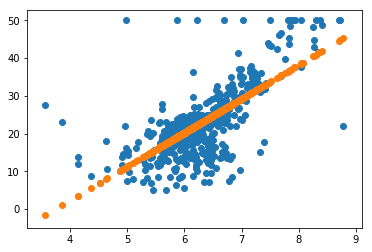

In [34]:
draw_rm_and_price()
price_by_random_k_and_b = [price(r, 8.978667894114528 , -33.6285883581618) for r in X_rm]
plt.scatter(X_rm, price_by_random_k_and_b)

### 3.Gradient Descent to get optimal k* and *b

In [21]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [33]:
trying_times = 2000


min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03


for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(Price, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))

    k_gradient = partial_k(X_rm, Price, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, Price, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -99.91347846395577 best_b: -72.83028944683379, and the loss is: 529036.9641080451
When time is : 50, get best_k: 10.762437017596552 best_b: -55.40621344851466, and the loss is: 151.07014322683406
When time is : 100, get best_k: 12.297699561404414 best_b: -55.13963175592905, and the loss is: 48.78076940918579
When time is : 150, get best_k: 12.315236954189752 best_b: -55.111674469952376, and the loss is: 48.74859624403313
When time is : 200, get best_k: 12.3116731664349 best_b: -55.08706467857712, and the loss is: 48.73622753370151
When time is : 250, get best_k: 12.307820517325881 best_b: -55.062530543326794, and the loss is: 48.723892346189984
When time is : 300, get best_k: 12.303968421254243 best_b: -55.038026530447034, and the loss is: 48.7115867868399
When time is : 350, get best_k: 12.300120897377525 best_b: -55.013551971804766, and the loss is: 48.69931078375083
When time is : 400, get best_k: 12.29627799610189 best_b: -54.9891068232184, and the los

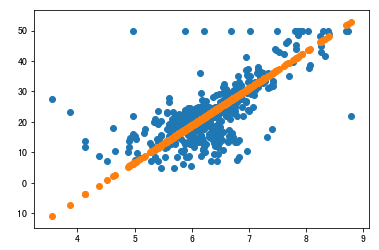

In [37]:
k = 12.179411217167699
b = -54.2457034510058
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### 4. Try different Loss function and learning rate.

$$Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$$

$$当({y_i - (kx_i + b)})>0时:~~Loss = \frac{1}{n} sum({y_i - (kx_i + b)}),~~~~\frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum(x_i),~~~~\frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum(1)$$

$$当({y_i - (kx_i + b)})<0时:~~Loss = \frac{1}{n} sum({(kx_i + b) - y_i}),~~~~\frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum(x_i),~~~~\frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum(1)$$

In [38]:
def loss_abs(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [40]:
def partial_k1(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if (y_i - y_hat_i) > 0: gradient += (-1) * x_i
        else: gradient += x_i
    
    return 1 / n * gradient


def partial_b1(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if (y_i - y_hat_i) > 0: gradient += (-1)
        else: gradient += 1

    return 1 / n * gradient

In [41]:
trying_times = 2000


min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03


for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss_abs(Price, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    

    k_gradient = partial_k(X_rm, Price, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, Price, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -86.73950413363896 best_b: -60.257094949405456, and the loss is: 627.9159716936249
When time is : 50, get best_k: 9.358800077226622 best_b: -45.13731332381468, and the loss is: 9.511389431283357
When time is : 100, get best_k: 10.693250539017523 best_b: -44.9149051207883, and the loss is: 4.481727250086203
When time is : 150, get best_k: 10.709899938500286 best_b: -44.89967709745925, and the loss is: 4.472814402663057
When time is : 200, get best_k: 10.708226049531012 best_b: -44.887344741600245, and the loss is: 4.472600837599703
When time is : 250, get best_k: 10.706299643237685 best_b: -44.875067218167416, and the loss is: 4.472476177390162
When time is : 300, get best_k: 10.704372012293538 best_b: -44.86280500449102, and the loss is: 4.472352899737243
When time is : 350, get best_k: 10.70244664847205 best_b: -44.85055753348087, and the loss is: 4.472229787364283
When time is : 400, get best_k: 10.700523597585708 best_b: -44.83832477979122, and the loss

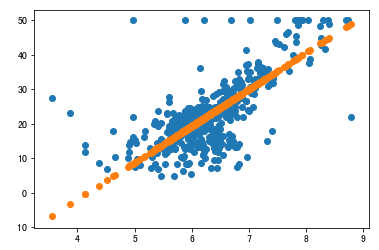

In [42]:
k = 10.642041542707657 
b = -44.46631352726251
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### change the learning rate and observe the performance:

In [45]:
trying_times = 2000


min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04


for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss_abs(Price, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    

    k_gradient = partial_k(X_rm, Price, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, Price, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -3.7172794117034584 best_b: 28.90945173051108, and the loss is: 17.10573980467367
When time is : 50, get best_k: -2.786363220290402 best_b: 29.047910009313316, and the loss is: 11.717439037250587
When time is : 100, get best_k: -2.1690546683374756 best_b: 29.137068525482082, and the loss is: 8.914687915106432
When time is : 150, get best_k: -1.7595680250687606 best_b: 29.193557332081912, and the loss is: 7.6003376909553815
When time is : 200, get best_k: -1.4878010846442533 best_b: 29.228396851153143, and the loss is: 7.118173790902597
When time is : 250, get best_k: -1.3072984392523421 best_b: 29.24889010820415, and the loss is: 7.0074589965922325


<font color=DeepPink>通过更改学习率可以发现，性能会受到学习率影响，本例中learning_rate = 1e-03显然比1e-04要好一些；由于学习率控制着参数按梯度反方向变化的大小，所以学习率的选择对性能结果至关重要。</font>

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:&ensp;&ensp;<font color=DeepPink>所谓创造一个复杂的准则我理解就是人为编写函数去实现某种目标，但是随着需求的变化和增加，编写的函数会愈发复杂甚至会很难编写出来，而自动生成这样的函数便可以解决上述问题，所以我们需要机器学习方法自动生成函数来替代人为编写的复杂准则。</font>

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:&ensp;&ensp;<font color=DeepPink>第一种方法采用完全随机选取参数的策略，导致结果完全随机，后面迭代选取的参数效果不如前面的情况会经常出现，不仅浪费时间而且效果不好。</font>

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:&ensp;&ensp;<font color=DeepPink>1)监督方向的方法比第一种方法效果要好，因为可以保证每次参数朝着相对正确的方向更新。</font>

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;<font color=DeepPink>2)缺点：得到的结果不一定是最优的，因为初始的方向是随机的，所以导致结果也是随机的，导致拟合效果时好时坏（多运行几次supervised direction的代码便可以发现） | 当监督到当前方向不正确时，从另外三个方向中随机选择的也不一定是最优的，但也可能会使损失减小，从而使结果偏离最优解。



###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: &ensp;&ensp;<font color=DeepPink>因为梯度可以反映函数值的变化方向，梯度为正，函数值增大；梯度为负，函数值减小。所以可以用梯度反方向来代替监督方法中的四个方向，让参数自动沿着梯度下降的方向更新，这样可以保证每次都沿着正确的方向更新，速度更快，所以我们选择用梯度来拟合目标函数。</font>

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:&ensp;&ensp;<font color=DeepPink>梯度相当于一元函数中的导数，即多元函数中的偏导数。</font>

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;<font color=DeepPink>下降指的是参数的更新沿着梯度下降的方向，从而可以使目标函数值不断的减小。</font>

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:&ensp;&ensp;<font color=DeepPink>梯度下降法相比前两种方法在选择参数的更新方向上没有随机因素，每次参数的更新都沿着正确的方向，所以其求解速度更快，结果也更优。</font>

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:&ensp;&ensp;<font color=DeepPink>机器利用数据自动生成函数来达到某种目标或解决某种问题的方法。</font>

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

> <font color=DeepPink>BFS和DFS应该都可以实现网络爬虫，而且我觉得两者的效果应该差不多，不知道我想的对不对？？？【希望助教能够帮忙解答 :) 】</font>

### 由于百度百科的html源码格式太没有规律了，所以本次作业我选择的网页源是<font color=DeepPink>北京地铁站官网</font>

In [82]:
import requests

In [83]:
import re

In [84]:
url = 'http://www.bjsubway.com/station/zjgls/#'

In [85]:
response = requests.get(url)

In [86]:
print(response.apparent_encoding)

GB2312


In [87]:
response.encoding = 'GB2312'

In [88]:
response.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<title>站间公里数 | 北京地铁官方网站</title>\r\n<meta name="keywords" content="北京地铁官方网站,首末车时间" />\r\n<meta name="description" content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" />\r\n<link rel="shortcut icon" href="http://www.bjsubway.com/favicon.ico" type="image/x-icon" />\r\n<link href="http://www.bjsubway.com/subway/css/common.css" rel="stylesheet" type="text/css" />\r\n<link href="http://www.bjsubway.com/subway/css/search.css" rel="stylesheet" type="text/css" />\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/jquery.js"></script>\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/around.js"></script>\r\n<script type="text/javascript">\r\n/*线路名称多窗口切换效果*/\r\nfunction GetId(id){\r\n  return document.getElementBy

In [89]:
line = r'<li class=".+" id=".+" onclick="doClick\(this\)"><a href="#">(\w+)</a></li>'
pattern_line = re.compile(line)
subway_name = pattern_line.findall(response.text)

In [90]:
subway_name

['1号线',
 '2号线',
 '4号线',
 '5号线',
 '6号线',
 '7号线',
 '8号线',
 '9号线',
 '10号线',
 '13号线',
 '14号线',
 '15号线',
 '八通线',
 '昌平线',
 '亦庄线',
 '大兴线',
 '房山线',
 '机场线']

In [91]:
content = response.text.split("<td colspan=")
content[11] = content[11] + content[12]
del content[12]

In [92]:
station = r'<th>(\w+)――(\w+)<\/th>'
pattern_station = re.compile(station)

In [93]:
subway_dict = {}
for i, str_ in enumerate(content[1:]):
    subway_dict[subway_name[i]] = pattern_station.findall(str_)

In [94]:
subway_dict

{'1号线': [('苹果园', '古城'),
  ('古城', '八角游乐园'),
  ('八角游乐园', '八宝山'),
  ('八宝山', '玉泉路'),
  ('玉泉路', '五棵松'),
  ('五棵松', '万寿路'),
  ('万寿路', '公主坟'),
  ('公主坟', '军事博物馆'),
  ('军事博物馆', '木樨地'),
  ('木樨地', '南礼士路'),
  ('南礼士路', '复兴门'),
  ('复兴门', '西单'),
  ('西单', '天安门西'),
  ('天安门西', '天安门东'),
  ('天安门东', '王府井'),
  ('王府井', '东单'),
  ('东单', '建国门'),
  ('建国门', '永安里'),
  ('永安里', '国贸'),
  ('国贸', '大望路'),
  ('大望路', '四惠'),
  ('四惠', '四惠东')],
 '2号线': [('西直门', '车公庄'),
  ('车公庄', '阜成门'),
  ('阜成门', '复兴门'),
  ('复兴门', '长椿街'),
  ('长椿街', '宣武门'),
  ('宣武门', '和平门'),
  ('和平门', '前门'),
  ('前门', '崇文门'),
  ('崇文门', '北京站'),
  ('北京站', '建国门'),
  ('建国门', '朝阳门'),
  ('朝阳门', '东四十条'),
  ('东四十条', '东直门'),
  ('东直门', '雍和宫'),
  ('雍和宫', '安定门'),
  ('安定门', '鼓楼大街'),
  ('鼓楼大街', '积水潭'),
  ('积水潭', '西直门')],
 '4号线': [('安河桥北', '北宫门'),
  ('北宫门', '西苑'),
  ('西苑', '圆明园'),
  ('圆明园', '北京大学东门'),
  ('北京大学东门', '中关村'),
  ('中关村', '海淀黄庄'),
  ('海淀黄庄', '人民大学'),
  ('人民大学', '魏公村'),
  ('魏公村', '国家图书馆'),
  ('国家图书馆', '动物园'),
  ('动物园', '西直门'),
  ('西直门', '新街口'),
  ('新街口', '平安里'),
  ('

In [95]:
js = json.dumps(subway_dict)  
file = open('E:/NLP/subway.txt', 'w') 
file.write(js)  
file.close()

In [48]:
from collections import defaultdict

In [49]:
subway_line_dict = defaultdict(list)

In [50]:
for x in subway_dict.values():
    for y in x:
        subway_line_dict[y[0]] = subway_line_dict[y[0]] + [y[1]]
        subway_line_dict[y[1]] = subway_line_dict[y[1]] + [y[0]]

In [51]:
subway_line_dict

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['车公庄', 

In [68]:
del subway_line_dict['通运门']   #由于通运门不停车，所以把它从字典中删除

In [70]:
for value in subway_line_dict.values():
    if '通运门' in value:
        value.remove('通运门')

In [71]:
js = json.dumps(subway_line_dict)  
file = open('E:/NLP/subway_line.txt', 'w') 
file.write(js)  
file.close()

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [61]:
location_info = {}
def get_lng_lat(dict_):
    for station in dict_.keys():
        url_map = 'http://api.map.baidu.com/geocoding/v3/?address=' + station + '&output=json&city=北京市&ak=AEIqh5CBAhGrcX7qfOSCCWRpyzDBi1eP&callback=showLocation'
        location = requests.get(url_map)
        if '"status":1' in location.text: 
            location_info[station] = ()
            continue
        location_info[station] = (float(re.findall(r'\{"lng":(.+\d+),"lat":.+\d+\}', location.text)[0]), float(re.findall(r'\{"lng":.+\d+,"lat":(.+\d+)\}', location.text)[0]))
    return location_info

In [62]:
subway_location = get_lng_lat(subway_line_dict)

In [63]:
subway_location

{'苹果园': (116.18963446946083, 39.934641008155275),
 '古城': (100.2324803392115, 26.883161684001312),
 '八角游乐园': (116.21884171520198, 39.91306522416191),
 '八宝山': (116.24327328947903, 39.920911909957624),
 '玉泉路': (116.25963607166538, 39.92188360686101),
 '五棵松': (116.28217797586152, 39.9418705099587),
 '万寿路': (116.30131575132756, 39.916633467892005),
 '公主坟': (116.19429242607256, 39.81074700702915),
 '军事博物馆': (116.33078176654712, 39.91560053332307),
 '木樨地': (116.34049402024633, 39.91406746721874),
 '南礼士路': (116.36004740034979, 39.921458633384084),
 '复兴门': (116.35985412093626, 39.91366077470702),
 '西单': (116.379282351811, 39.91679779576148),
 '天安门西': (116.39701423513696, 39.91367461017862),
 '天安门东': (116.40726021795322, 39.91410696724626),
 '王府井': (116.46738784811086, 39.88765922489592),
 '东单': (116.4249340123534, 39.91478492712774),
 '建国门': (116.44226799215203, 39.91453005191511),
 '永安里': (116.45905573752259, 39.910516038804346),
 '国贸': (116.46783149874459, 39.91879959387437),
 '大望路': (116.481

In [64]:
del subway_location['通运门']   #由于通运门不停车，所以把它从字典中删除

In [65]:
subway_location['动物园'] = (116.345204, 39.943923)
subway_location['草房'] = (116.622546, 39.930673)
subway_location['潞城'] = (116.754799, 39.90889)
subway_location['化工'] = (116.510091, 39.893222)
subway_location['双合'] = (116.533265, 39.866414)
subway_location['育新'] = (116.353997, 40.066124)
subway_location['首经贸'] = (116.326613, 39.85032)
subway_location['泥洼'] = (116.310813, 39.8647)
subway_location['枣营'] = (116.48155, 39.950188)
subway_location['阜通'] = (116.477642, 39.997887)
subway_location['广阳城'] = (116.191395, 39.754016)

In [66]:
subway_location

{'苹果园': (116.18963446946083, 39.934641008155275),
 '古城': (100.2324803392115, 26.883161684001312),
 '八角游乐园': (116.21884171520198, 39.91306522416191),
 '八宝山': (116.24327328947903, 39.920911909957624),
 '玉泉路': (116.25963607166538, 39.92188360686101),
 '五棵松': (116.28217797586152, 39.9418705099587),
 '万寿路': (116.30131575132756, 39.916633467892005),
 '公主坟': (116.19429242607256, 39.81074700702915),
 '军事博物馆': (116.33078176654712, 39.91560053332307),
 '木樨地': (116.34049402024633, 39.91406746721874),
 '南礼士路': (116.36004740034979, 39.921458633384084),
 '复兴门': (116.35985412093626, 39.91366077470702),
 '西单': (116.379282351811, 39.91679779576148),
 '天安门西': (116.39701423513696, 39.91367461017862),
 '天安门东': (116.40726021795322, 39.91410696724626),
 '王府井': (116.46738784811086, 39.88765922489592),
 '东单': (116.4249340123534, 39.91478492712774),
 '建国门': (116.44226799215203, 39.91453005191511),
 '永安里': (116.45905573752259, 39.910516038804346),
 '国贸': (116.46783149874459, 39.91879959387437),
 '大望路': (116.481

In [67]:
js = json.dumps(subway_location)  
file = open('E:/NLP/location.txt', 'w') 
file.write(js)  
file.close()

In [18]:
for key, lng_lat in subway_location.items():
    subway_location[key] = (lng_lat[0]*100, lng_lat[1]*100)

In [19]:
subway_location

{'苹果园': (11.618963446946083, 3.9934641008155274),
 '古城': (10.023248033921151, 2.688316168400131),
 '八角游乐园': (11.621884171520199, 3.9913065224161914),
 '八宝山': (11.624327328947903, 3.9920911909957626),
 '玉泉路': (11.62596360716654, 3.992188360686101),
 '五棵松': (11.628217797586151, 3.9941870509958703),
 '万寿路': (11.630131575132758, 3.991663346789201),
 '公主坟': (11.619429242607259, 3.9810747007029157),
 '军事博物馆': (11.633078176654713, 3.9915600533323077),
 '木樨地': (11.634049402024633, 3.9914067467218746),
 '南礼士路': (11.63600474003498, 3.9921458633384086),
 '复兴门': (11.635985412093627, 3.9913660774707025),
 '西单': (11.637928235181102, 3.991679779576149),
 '天安门西': (11.6397014235137, 3.991367461017862),
 '天安门东': (11.640726021795322, 3.9914106967246266),
 '王府井': (11.646738784811086, 3.9887659224895926),
 '东单': (11.642493401235342, 3.9914784927127744),
 '建国门': (11.644226799215202, 3.9914530051915116),
 '永安里': (11.64590557375226, 3.9910516038804347),
 '国贸': (11.64678314987446, 3.991879959387437),
 '大望路': (

In [7]:
import json

In [8]:
file = open('E:/NLP/subway_line.txt', 'r') 
js = file.read()
subway_line_dict = json.loads(js)   

In [9]:
file = open('E:/NLP/location.txt', 'r') 
js = file.read()
subway_location = json.loads(js)   

In [7]:
import networkx as nx

In [8]:
station_graph = nx.Graph()

In [9]:
station_graph.add_nodes_from(list(subway_location.keys()))

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

In [20]:
plt.figure(figsize=(200,200))
plt.subplot(111)
nx.draw(station_graph, subway_location, with_labels=True, node_size=300, font_size=30)
plt.show()

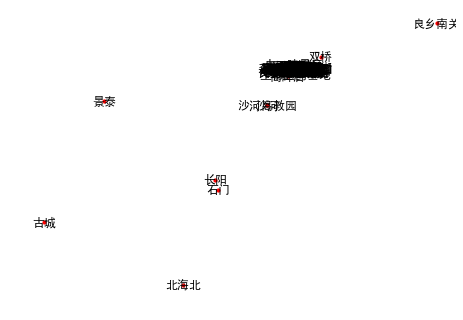

In [13]:
nx.draw(station_graph, subway_location, with_labels=True, node_size=10)

## <font color=DeepPink>高老师，看上面的两幅图，感觉画布调大也不能解决站点聚在一起的问题 :( </font>

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [61]:
def search(start, destination, connection_grpah):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: 
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue 
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: 
                print('🚗->'.join(new_path))
                return new_path
        
        visitied.add(froninter)

In [62]:
search('奥体中心', '天安门东', subway_line_dict)

奥体中心🚗->北土城🚗->安华桥🚗->安德里北街🚗->鼓楼大街🚗->什刹海🚗->南锣鼓巷🚗->东四🚗->灯市口🚗->东单🚗->王府井🚗->天安门东


['奥体中心',
 '北土城',
 '安华桥',
 '安德里北街',
 '鼓楼大街',
 '什刹海',
 '南锣鼓巷',
 '东四',
 '灯市口',
 '东单',
 '王府井',
 '天安门东']

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

### 首先计算站点之间的距离

In [2]:
import math

In [3]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [4]:
def get_geo_distance(city1, city2):
    return geo_distance(subway_location[city1], subway_location[city2])

In [65]:
subway_location

{'苹果园': [116.18963446946083, 39.934641008155275],
 '古城': [100.2324803392115, 26.883161684001312],
 '八角游乐园': [116.21884171520198, 39.91306522416191],
 '八宝山': [116.24327328947903, 39.920911909957624],
 '玉泉路': [116.25963607166538, 39.92188360686101],
 '五棵松': [116.28217797586152, 39.9418705099587],
 '万寿路': [116.30131575132756, 39.916633467892005],
 '公主坟': [116.19429242607256, 39.81074700702915],
 '军事博物馆': [116.33078176654712, 39.91560053332307],
 '木樨地': [116.34049402024633, 39.91406746721874],
 '南礼士路': [116.36004740034979, 39.921458633384084],
 '复兴门': [116.35985412093626, 39.91366077470702],
 '西单': [116.379282351811, 39.91679779576148],
 '天安门西': [116.39701423513696, 39.91367461017862],
 '天安门东': [116.40726021795322, 39.91410696724626],
 '王府井': [116.46738784811086, 39.88765922489592],
 '东单': [116.4249340123534, 39.91478492712774],
 '建国门': [116.44226799215203, 39.91453005191511],
 '永安里': [116.45905573752259, 39.910516038804346],
 '国贸': [116.46783149874459, 39.91879959387437],
 '大望路': [116.481

In [70]:
get_geo_distance('奥体中心', '天安门东')

3.9355111611642424

In [24]:
def search_optional(start, destination, connection_grpah, sort_candidate):
    pathes_result = []
    
    pathes = [[start]]
    
    visitied = set()
    
    flag = True
    while flag: 
        path = pathes.pop(0)
        froninter = path[-1]
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue 
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: 
                pathes_result.append(new_path)
                if len(pathes_result) > 10:
                    flag = False
                    break
        
        visitied.add(froninter)
    
    print('🚗->'.join(sort_candidate(pathes_result)))
    
    return sort_candidate(pathes_result)

### <font color=DeepPink>1.下面的是路程最短优先的结果，和高德地图的时间最短优先结果相同</font>

In [25]:
def shortest_path_priority(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(len(path)-1):
            distance += get_geo_distance(path[i], path[i+1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)[0]

In [26]:
search_optional('奥体中心', '天安门东', subway_line_dict, shortest_path_priority)

奥体中心🚗->北土城🚗->安华桥🚗->安德里北街🚗->鼓楼大街🚗->积水潭🚗->西直门🚗->车公庄🚗->阜成门🚗->复兴门🚗->西单🚗->天安门西🚗->天安门东


['奥体中心',
 '北土城',
 '安华桥',
 '安德里北街',
 '鼓楼大街',
 '积水潭',
 '西直门',
 '车公庄',
 '阜成门',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东']

### <font color=DeepPink>2.下面的是最少换乘优先的结果，和高德地图的时间最短优先结果相同</font>

In [29]:
def minimum_transfer_priority(pathes):
    
    f = open('E:/NLP/subway.txt', 'r')
    js = f.read()
    subway_dict_ = json.loads(js)
    
    if len(pathes) <= 1: return pathes
    
    def get_transfer_number(path):
        
        appearence = set()
        
        for i in range(len(path)-1):
            for name, line in subway_dict_.items():
                if ([path[i], path[i+1]] in line) or ([path[i+1], path[i]] in line): 
                    appearence.add(name)
        
        transfer_number = len(appearence) - 1
            
        return transfer_number

    return sorted(pathes, key=get_transfer_number)[0]

In [30]:
search_optional('八宝山', '动物园', subway_line_dict, minimum_transfer_priority)

八宝山🚗->玉泉路🚗->五棵松🚗->万寿路🚗->公主坟🚗->军事博物馆🚗->木樨地🚗->南礼士路🚗->复兴门🚗->西单🚗->灵境胡同🚗->西四🚗->平安里🚗->新街口🚗->西直门🚗->动物园


['八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '灵境胡同',
 '西四',
 '平安里',
 '新街口',
 '西直门',
 '动物园']

### <font color=DeepPink>3.下面的是综合优先的结果，选取了一个比较简单的策略来给出综合结果</font>

In [33]:
def comprehensive_priority(pathes):
    
    f = open('E:/NLP/subway.txt', 'r')
    js = f.read()
    subway_dict_ = json.loads(js)
    
    if len(pathes) <= 1: return pathes
    
    def get_transfer_number(path):
        
        appearence = set()
        
        for i in range(len(path)-1):
            for name, line in subway_dict_.items():
                if ([path[i], path[i+1]] in line) or ([path[i+1], path[i]] in line): 
                    appearence.add(name)
        
        transfer_number = len(appearence) - 1
    
        return transfer_number
    
    
    def get_path_distnace(path):
        distance = 0
        for i in range(len(path)-1):
            distance += get_geo_distance(path[i], path[i+1])
            
        return distance
    
    
    transfer_list, path_list = [], []
    
    transfer_priority_result = sorted(pathes, key=get_transfer_number)
    path_priority_result = sorted(pathes, key=get_path_distnace)
    
#     for i in transfer_priority_result:
#         transfer_list.append([i, get_transfer_number(i)])
#     for j in path_priority_result:
#         path_list.append([j, get_path_distnace(j)])
    
    if path_priority_result[0] in transfer_priority_result[:3]:
        return path_priority_result[0]
    else: return transfer_priority_result[0]
    
#     return transfer_list, path_list
    
#     return sorted(pathes, key=get_transfer_number)

In [35]:
search_optional('八宝山', '动物园', subway_line_dict, comprehensive_priority)

八宝山🚗->玉泉路🚗->五棵松🚗->万寿路🚗->公主坟🚗->军事博物馆🚗->白堆子🚗->白石桥南🚗->国家图书馆🚗->动物园


['八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '白堆子', '白石桥南', '国家图书馆', '动物园']

## <font color=DeepPink>截止2019.7.16日7:25分，还剩by_way的部分没做</font>

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)